# Product Master Data Analysis (Annex 1)

## 1. Objectives
This notebook analyzes the product master data (`annex1.csv`) to understand the product portfolio structure, category distribution, and data quality.

**Key Goals:**
- **Data Engineering**: Deep cleaning (handling duplicates, validating types) and exporting a clean dataset.
- **Visual Analytics**: Interactive exploration of category distribution using Plotly.
- **Strategic Insights**: Provide actionable recommendations on portfolio optimization.

In [23]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import warnings

# Settings
warnings.filterwarnings('ignore')
pio.templates.default = "plotly_white"

## 2. Data Ingestion & Engineering
We load the data and check for basic structural integrity.

In [24]:
# Load the dataset
file_path = 'annex1.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File {file_path} not found.")

Data loaded successfully.
Shape: (251, 4)


In [25]:
# Preview data
df.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [26]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


### Data Cleaning
- **Missing Values**: Identify and handle any nulls.
- **Duplicates**: Check for duplicate Item Codes.
- **Standardization**: Trim whitespace from text columns.

In [27]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

# Check for duplicates in primary key (Item Code)
duplicates = df['Item Code'].duplicated().sum()
print(f"\nDuplicate Item Codes: {duplicates}")

# Remove duplicates if any (keeping first)
if duplicates > 0:
    df = df.drop_duplicates(subset='Item Code', keep='first')
    print("Duplicates removed.")

# Ensure consistent string formatting
df['Item Name'] = df['Item Name'].astype(str).str.strip()
df['Category Name'] = df['Category Name'].astype(str).str.strip()
print("String columns stripped of whitespace.")

# EXPORT CLEANED DATA
cleaned_file_path = 'annex1_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data exported to {cleaned_file_path}")

Missing Values:
 Series([], dtype: int64)

Duplicate Item Codes: 0
String columns stripped of whitespace.
Cleaned data exported to annex1_cleaned.csv


## 3. Interactive Visualization Matrix

### 3.1 Category Distribution (Treemap)
This interactive treemap allows you to zoom in on category proportions. It answers the question: "Which categories dominate our portfolio?"

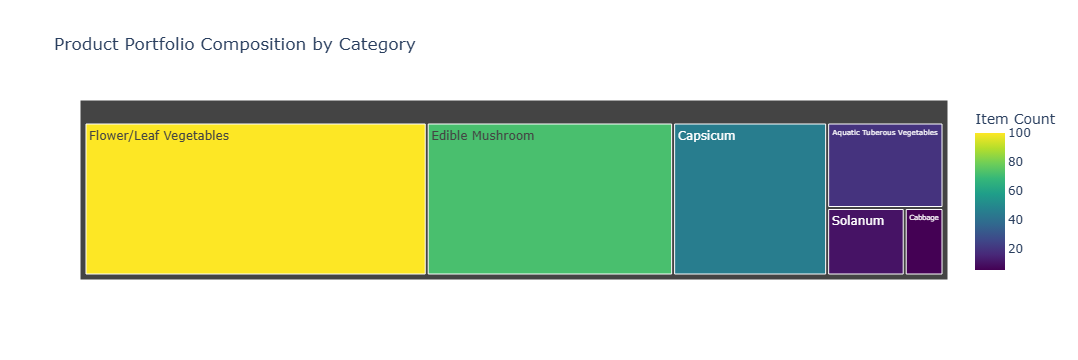

In [28]:
# Count items per category
category_counts = df['Category Name'].value_counts().reset_index()
category_counts.columns = ['Category Name', 'Item Count']

# Interactive Treemap
fig = px.treemap(category_counts, 
                 path=['Category Name'], 
                 values='Item Count',
                 title='Product Portfolio Composition by Category',
                 color='Item Count',
                 color_continuous_scale='Viridis')
fig.show()

### 3.2 Category Count (Bar Chart)
A clear ranked view of category breadth.

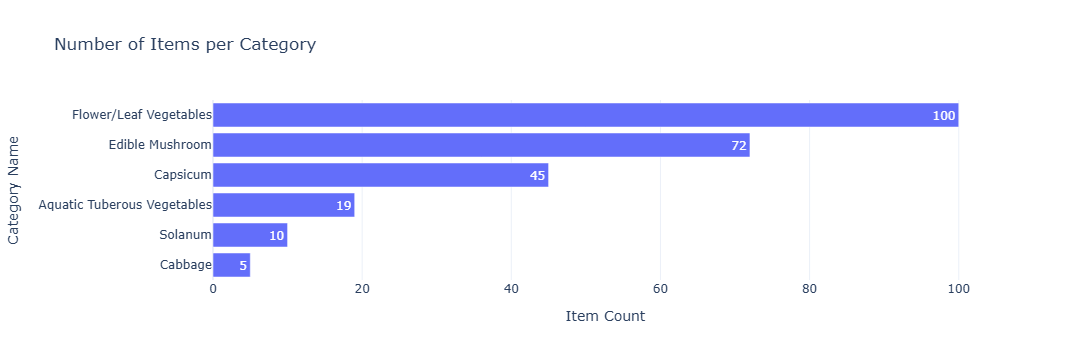

In [29]:
# Interactive Bar Chart
fig = px.bar(category_counts, 
             x='Item Count', 
             y='Category Name', 
             orientation='h',
             title='Number of Items per Category',
             text='Item Count')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

## 4. Strategic Insights & Business Recommendations

### 📊 Data Intelligence
- **Portfolio Structure**: The Treemap above visualizes the weight of each category. A large area indicates a category with many SKUs.
- **Data Hygiene**: The duplicate check ensures that our Master Data is clean, which is a prerequisite for accurate sales reporting.

### 🚀 Actionable Recommendations
1.  **Portfolio Rationalization**: 
    -   *Insight*: If you see categories with very few items (small boxes in the treemap), consider if these are strategic niche products or legacy clutter.
    -   *Action*: Review the bottom 20% of categories for potential deprecation to simplify supply chain.

2.  **Category Expansion**:
    -   *Insight*: Large categories (top bars in the bar chart) represent core business areas.
    -   *Action*: Focus R&D and marketing efforts on these dominant categories as they likely drive the bulk of brand perception.

3.  **Data Governance**:
    -   *Insight*: Check if 'Category Code' and 'Category Name' have a strict 1:1 relationship.
    -   *Action*: Implement automated validation rules in the ERP system to prevent future duplicate Item Codes.